In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utils_plot import extract_data_from_dfgen
from utils_plot import trajInspection
from utils_plot import tsne_anslysis

In [4]:
from utils_evaluation import create_df_for_cdf, sns_comparison
from utils_evaluation import create_df_for_lineplot, sns_ks
from utils_evaluation import weighted_ks_2samp

# Load Data

In [5]:
# Replace 'your_file.csv' with the actual path to your CSV file
path_raw = 'Synthetic_crash_scenarios.csv'
# path_raw = '/content/drive/MyDrive/Colab Notebooks/Thesis Crash Generation/New dataset/Synthetic_crash_scenarios.csv'
# path_gen = 'Synthetic_Crash_50.csv'
# path_gen = 'Synthetic_Crash_dtw_50_postprocessed.csv'
# path_gen = 'Synthetic_Crash_dtw_02_postprocessed.csv'
path_gen = "Synthetic_Crash_dtw_02_80_postprocessed.csv"

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(path_raw)
df_gen = pd.read_csv(path_gen)

In [6]:
## read the ID of train, val, test dataset
import pickle
# # with open('.\\utils_data\\Idx_fd_50_split.pkl', 'rb') as f:
# with open('.\\utils_data\\Idx_fd_02_split.pkl', 'rb') as f:
#     list_train_val_test = pickle.load(f)
# list_train_val_test = list_train_val_test[0]

# ID_train, ID_val, ID_test = list_train_val_test[0], list_train_val_test[1], list_train_val_test[2]
# ID_train, ID_val, ID_test = ID_train+1, ID_val+1, ID_test+1

with open(".\\utils_data\\Idx_fddtw_02_80_split.pkl", 'rb') as f:
    Idx_and_y = pickle.load(f)

idx_train, idx_val, idx_test = Idx_and_y[0][0], Idx_and_y[0][1], Idx_and_y[0][2]
idx_trainval = Idx_and_y[1][0]
y_trainval = Idx_and_y[2][0]

ID_train, ID_val, ID_test = np.copy(idx_train+1), np.copy(idx_val+1), np.copy(idx_test+1)
ID_trainval = np.copy(idx_trainval+1)

y_train = y_trainval[np.array([list(ID_trainval).index(ID) for ID in ID_train])]
y_val = y_trainval[np.array([list(ID_trainval).index(ID) for ID in ID_val])]

In [8]:
ID_eva_raw = np.copy(ID_train)

# V_l = np.zeros((5000,97))
# V_f = np.zeros((5000,97))
# D = np.zeros((5000,97))
# Weight = np.zeros(5000)
V_l = np.zeros((ID_eva_raw.shape[0],97))
V_f = np.zeros((ID_eva_raw.shape[0],97))
D = np.zeros((ID_eva_raw.shape[0],97))
Weight = np.zeros(ID_eva_raw.shape[0])
# for i in range(1,5001):
for i, ID in enumerate(ID_eva_raw):
    v_l_i = df_raw[df_raw["id"]==ID].iloc[-98:-1, 3].to_numpy()
    v_f_i = df_raw[df_raw["id"]==ID].iloc[-98:-1, 2].to_numpy()
    d_i = df_raw[df_raw["id"]==ID].iloc[-98:-1, 4].to_numpy() - df_raw[df_raw["id"]==ID].iloc[-2, 4]
    weight_i = df_raw[df_raw["id"]==ID].iloc[0, 6]
    V_l[i,:], V_f[i,:], D[i,:] = v_l_i, v_f_i, d_i
    Weight[i] = weight_i

import copy
V_l_raw = copy.deepcopy(V_l)
V_f_raw = copy.deepcopy(V_f)
D_raw = copy.deepcopy(D)
Weight_raw = copy.deepcopy(Weight)

# Trajectories Visualization

In [11]:
from utils_cluster import genNormalizedX

# ID_eva = copy.deepcopy(ID_test)
ID_eva = copy.deepcopy(ID_train)
# ID_eva = np.arange(1,5001)

split_type = 'train'
V_l_gen_eva = extract_data_from_dfgen(df_gen,para = 'v_l',split_type = split_type)
V_f_gen_eva = extract_data_from_dfgen(df_gen,para = 'v_f',split_type = split_type)
D_gen_eva = extract_data_from_dfgen(df_gen,para = 'd',split_type = split_type)
Weight_gen_eva = extract_data_from_dfgen(df_gen,para = 'weight',split_type = split_type)
# ReWeight_gen_eva = extract_data_from_dfgen(df_gen,para = 'reweight',split_type = split_type)
y_gen_eva = extract_data_from_dfgen(df_gen,para = 'label',split_type = split_type)
# idxcut_gen_eva = extract_data_from_dfgen(df_gen,para = 'qualify',split_type = split_type)

# X_raw_eva = genNormalizedX(V_l_raw[ID_eva-1],V_f_raw[ID_eva-1],D_raw[ID_eva-1])
X_raw_eva = genNormalizedX(V_l_raw,V_f_raw,D_raw)
X_gen_eva = genNormalizedX(V_l_gen_eva,V_f_gen_eva,D_gen_eva)

# X_gen_eva = X_gen_eva[:int(X_gen_eva.shape[0]/15*3)]
# Weight_gen_eva = Weight_gen_eva[:int(Weight_gen_eva.shape[0]/15*3)]

In [12]:
# # y_gen_eva = np.load(".\\utils_data\\hc_fddtw_y_50.npy")
# # y_gen_eva_filter = y_gen_eva[1]
# # y_gen_eva = y_gen_eva[0]
# y_raw = np.load('.\\utils_data\\hc_fd_y.npy')
# y_raw_eva = y_raw[ID_eva-1]

y_raw_eva = np.copy(y_train)

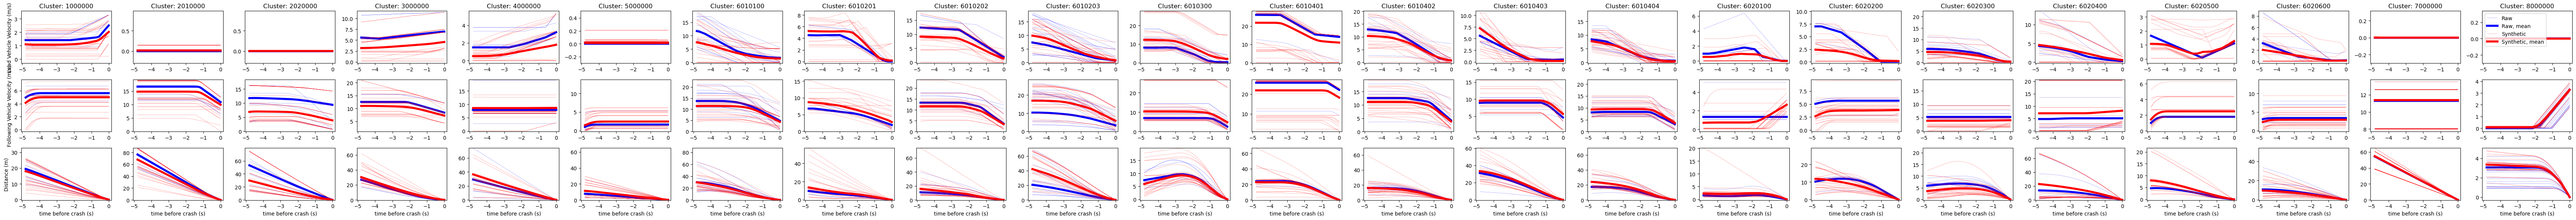

In [22]:
trajInspection(
    X_raw_eva,X_gen_eva,
    y_raw_eva,y_gen_eva,
    # Weight_raw[ID_eva-1],Weight_gen_eva,
    Weight_raw,Weight_gen_eva,
    traj_number = 25,
    line_transparency = 1,
)

In [18]:
trajInspection(
    X_raw_eva,X_gen_eva[idxcut_gen_eva],
    y_raw_eva,y_gen_eva[idxcut_gen_eva],
    # Weight_raw[ID_eva-1],ReWeight_gen_eva[idxcut_gen_eva],
    Weight_raw,ReWeight_gen_eva[idxcut_gen_eva],
    traj_number = 25,
    line_transparency = 1,
)

NameError: name 'idxcut_gen_eva' is not defined

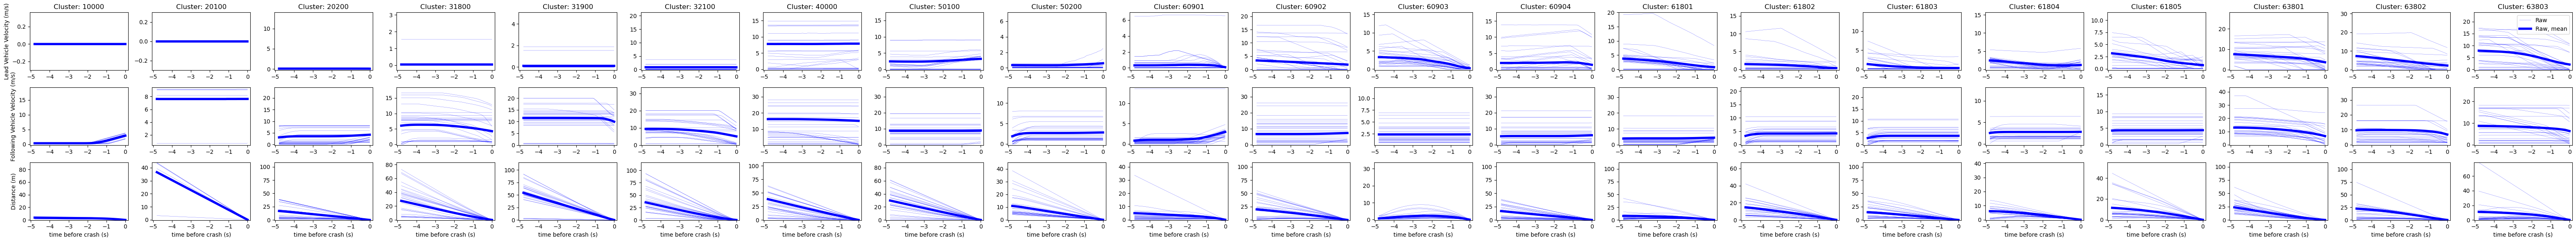

In [14]:
from utils_plot import clsInspection
clsInspection(
    X_gen_eva[~idxcut_gen_eva],
    y_gen_eva[~idxcut_gen_eva],
    Weight_gen_eva[~idxcut_gen_eva],
    traj_number = 25,
    line_transparency = 1,
)

In [15]:
# [:y_gen_eva.shape[0]][y_gen_eva_filter!=-1]

# T-SNE plot

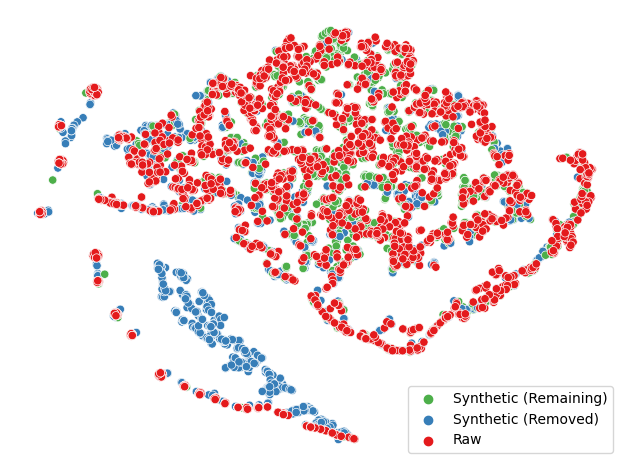

,y,comp-1,comp-2,weights
0,Synthetic (Remaining),63.947990,-2.848607,1
1,Synthetic (Removed),-43.527607,20.768879,1
2,Synthetic (Remaining),-32.564129,24.566151,1
3,Synthetic (Removed),59.811268,12.304691,1
4,Synthetic (Removed),3.945507,-25.934511,1
...,...,...,...,...
6059,Raw,-11.825950,40.565510,1
6060,Raw,17.324301,14.776700,1
6061,Raw,36.773937,-12.543887,1
6062,Raw,-29.416605,18.042660,1


In [17]:
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[::9,:,0],idxcut_gen_eva[::9])

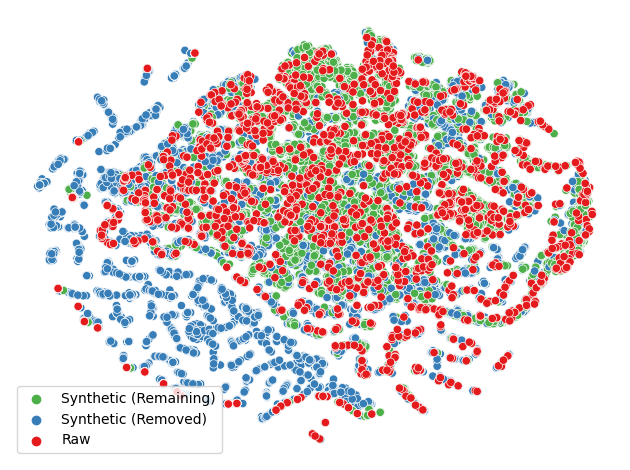

,y,comp-1,comp-2,weights
0,Synthetic (Remaining),91.557060,12.458988,1
1,Synthetic (Removed),-82.897026,-5.275025,1
2,Synthetic (Remaining),-68.226799,49.973267,1
3,Synthetic (Remaining),-40.015942,-16.638290,1
4,Synthetic (Removed),-57.441139,34.890095,1
...,...,...,...,...
36379,Raw,-24.946602,61.741695,1
36380,Raw,25.821878,-5.725116,1
36381,Raw,63.075405,-2.450420,1
36382,Raw,-39.078602,14.614840,1


In [18]:
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[:,:,0],idxcut_gen_eva)

# Distribution Evaluation

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


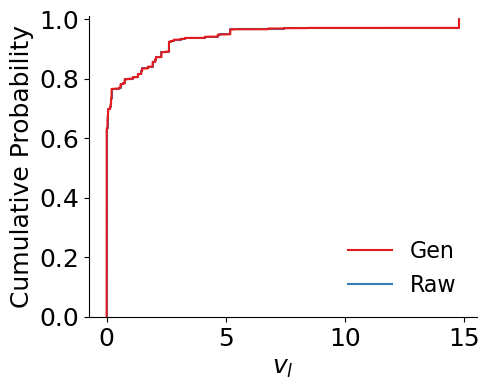

p_value on t = 0s is 1.0


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


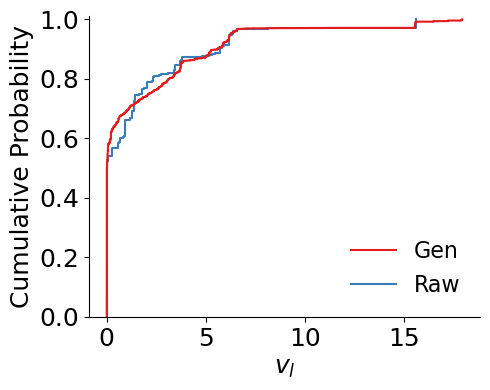

p_value on t = 1s is 0.8970401558028768


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


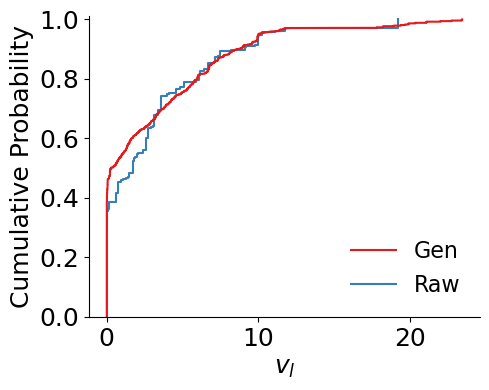

p_value on t = 2s is 0.4926740744012055


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


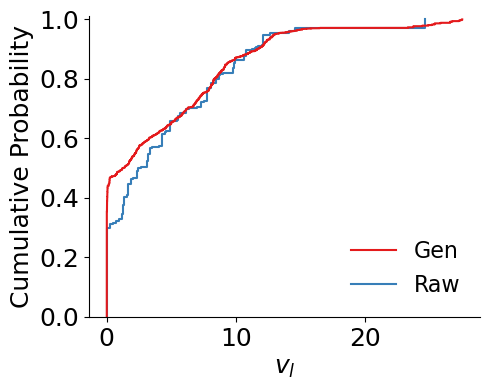

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 3s is 0.17387941073822533


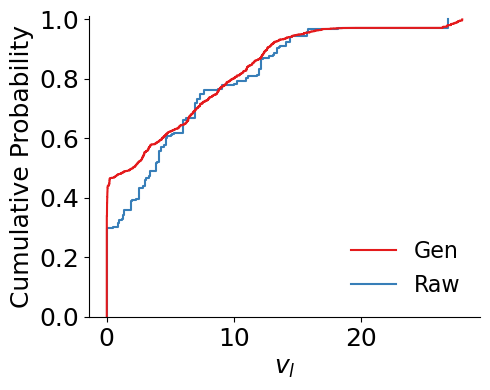

p_value on t = 4s is 0.13635004562036124


In [16]:
import copy
para = "v_l"
# ID_eva = copy.deepcopy(ID_test)
ID_eva = copy.deepcopy(ID_train)
split_type = 'train'

## read the data
if para in ["v_l","v_f","d"]:
    Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type)
# elif para == "v_l_dt"
Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type=split_type)

if para == "v_l":
    # Para_raw_eva = V_l_raw[ID_eva-1]
    Para_raw_eva = np.copy(V_l_raw)
elif para == "v_f":
    # Para_raw_eva = V_f_raw[ID_eva-1]
    Para_raw_eva = np.copy(V_f_raw)
elif para == "d":
    # Para_raw_eva = D_raw[ID_eva-1]
    Para_raw_eva = np.copy(D_raw)
# Weight_raw_eva = Weight_raw[ID_eva-1]
Weight_raw_eva = np.copy(Weight_raw)

## plotting
for t in range(5):
    df_plot = create_df_for_cdf(
        [Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t]],
        ["Gen","Raw"],
        [Weight_gen_eva,Weight_raw_eva],
    )

    plt.figure(figsize=(5,4))
    sns_comparison(
        data = df_plot,
        x = "Data",
        weights = "Weight",
        hue = "Label",
        type='ecdf',
        # legend_off = True,
        xlabel=f"${para}$",
        ylabel="Cumulative Probability",
        xaxis_off=True,
        yaxis_off=True,
        # xticks_off=True,
        # yticks_off=True,
        ylim=[0,1.01],
    )
    plt.show()

    _, p_value = weighted_ks_2samp(
        Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t],
        Weight_gen_eva,Weight_raw_eva
    )
    print(f"p_value on t = {t}s is {p_value}")

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


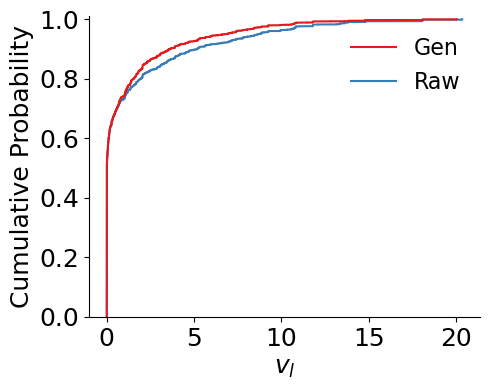

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 0s is 0.5054032214132846


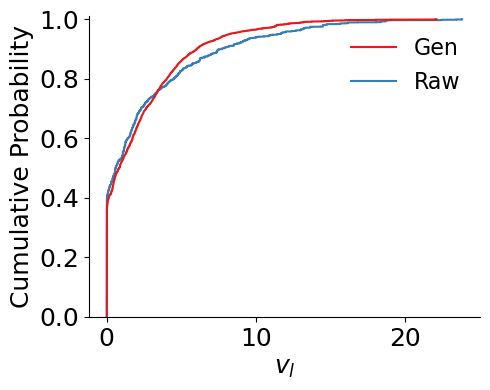

p_value on t = 1s is 0.27065927373413945


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


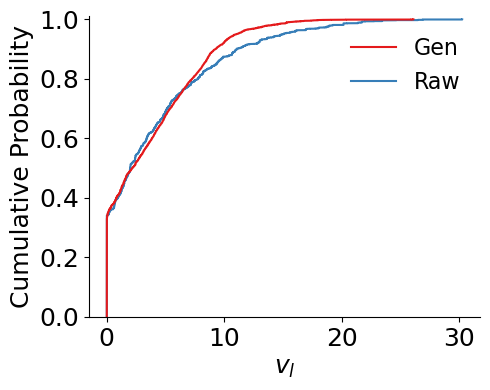

p_value on t = 2s is 0.06987914064294076


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


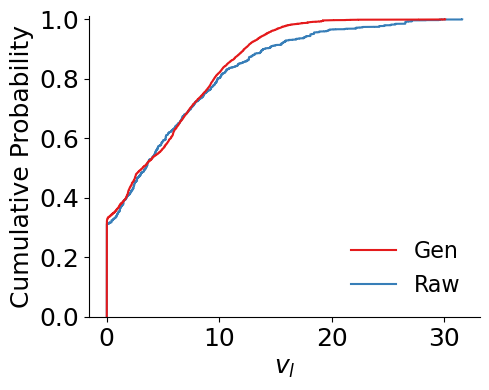

p_value on t = 3s is 0.10728795136392999


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


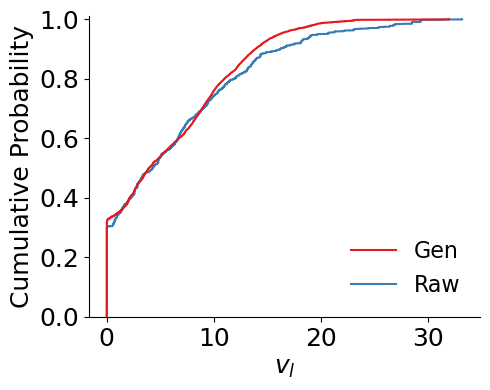

p_value on t = 4s is 0.18581629573683411


In [21]:
import copy
para = "v_l"
ID_eva = copy.deepcopy(ID_test)

## read the data
if para in ["v_l","v_f","d"]:
    Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test',nofilter=False)
# elif para == "v_l_dt"
Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type='test',nofilter=False)

if para == "v_l":
    Para_raw_eva = V_l_raw[ID_eva-1]
elif para == "v_f":
    Para_raw_eva = V_f_raw[ID_eva-1]
elif para == "d":
    Para_raw_eva = D_raw[ID_eva-1]
Weight_raw_eva = Weight_raw[ID_eva-1]

## plotting
for t in range(5):
    df_plot = create_df_for_cdf(
        [Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t]],
        ["Gen","Raw"],
        [Weight_gen_eva,Weight_raw_eva],
    )

    plt.figure(figsize=(5,4))
    sns_comparison(
        data = df_plot,
        x = "Data",
        weights = "Weight",
        hue = "Label",
        type='ecdf',
        # legend_off = True,
        xlabel=f"${para}$",
        ylabel="Cumulative Probability",
        xaxis_off=True,
        yaxis_off=True,
        # xticks_off=True,
        # yticks_off=True,
        ylim=[0,1.01],
    )
    plt.show()

    _, p_value = weighted_ks_2samp(
        Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t],
        Weight_gen_eva,Weight_raw_eva
    )
    print(f"p_value on t = {t}s is {p_value}")

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


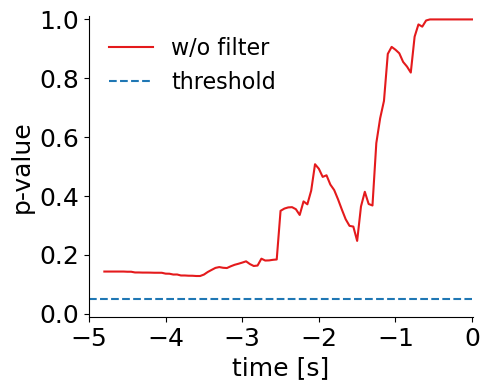

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


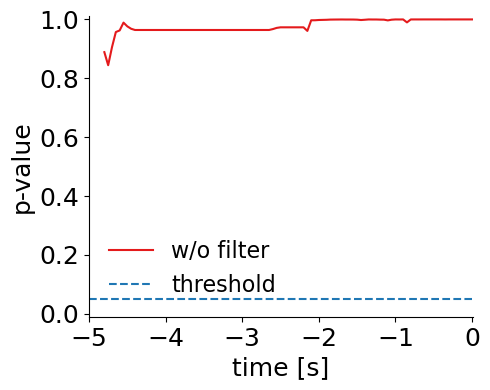

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


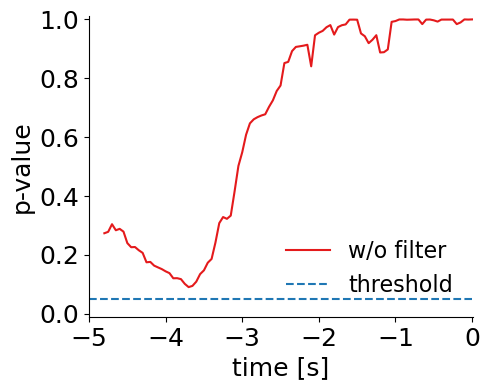

In [20]:
import copy
# ID_eva = copy.deepcopy(ID_test)
ID_eva = copy.deepcopy(ID_train)

for para in ["v_l","v_f","d"]:
    
    split_type = 'train'
    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type=split_type)
    
    if para == "v_l":
        # Para_raw_eva = V_l_raw[ID_eva-1]
        Para_raw_eva = V_l_raw
    elif para == "v_f":
        # Para_raw_eva = V_f_raw[ID_eva-1]
        Para_raw_eva = V_f_raw
    elif para == "d":
        # Para_raw_eva = D_raw[ID_eva-1]
        Para_raw_eva = D_raw
    # Weight_raw_eva = Weight_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)

    ## Plotting
    df_plot = create_df_for_lineplot(
        [P_value],
        ['w/o filter']
    )
    
    plt.figure(figsize=(5,4))
    sns_ks(data = df_plot,
           # legend_off = True,
           xlabel="time [s]",
           ylabel="p-value",
           xlim=[-5,0.01],
           ylim=[-0.01,1.01],
           # labels = {'w/o filter':'w/o filter'},
           xaxis_off=True,
           yaxis_off=True,
           # xticks_off=True,
           # yticks_off=True,
    )
    plt.show()

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


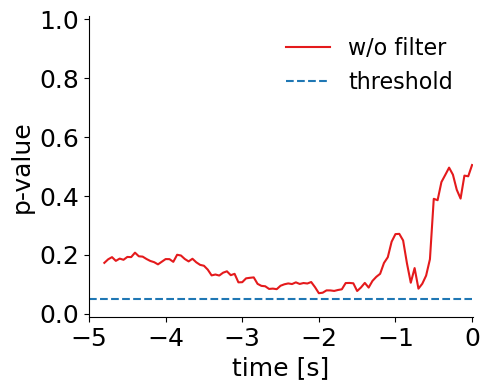

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


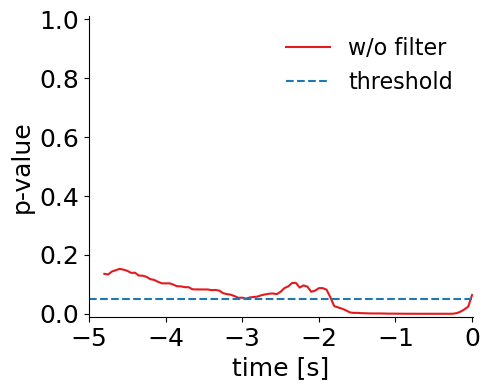

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


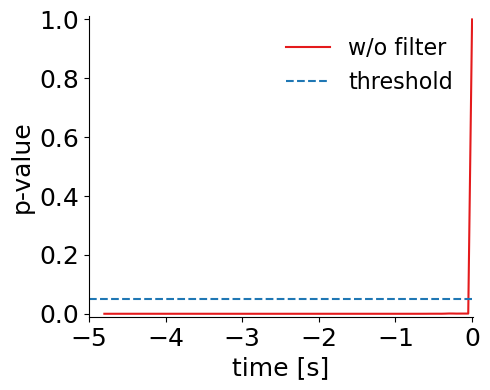

In [101]:
import copy
ID_eva = copy.deepcopy(ID_test)

for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test',nofilter=False)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type='test',nofilter=False)
    
    if para == "v_l":
        Para_raw_eva = V_l_raw[ID_eva-1]
    elif para == "v_f":
        Para_raw_eva = V_f_raw[ID_eva-1]
    elif para == "d":
        Para_raw_eva = D_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw[ID_eva-1]

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)

    ## Plotting
    df_plot = create_df_for_lineplot(
        [P_value],
        ['w/o filter']
    )
    
    plt.figure(figsize=(5,4))
    sns_ks(data = df_plot,
           # legend_off = True,
           xlabel="time [s]",
           ylabel="p-value",
           xlim=[-5,0.01],
           ylim=[-0.01,1.01],
           # labels = {'w/o filter':'w/o filter'},
           xaxis_off=True,
           yaxis_off=True,
           # xticks_off=True,
           # yticks_off=True,
    )
    plt.show()

In [84]:
import copy
ID_eva = copy.deepcopy(ID_test)

List_P = []
for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test')
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type='test')
    
    if para == "v_l":
        Para_raw_eva = V_l_raw[ID_eva-1]
    elif para == "v_f":
        Para_raw_eva = V_f_raw[ID_eva-1]
    elif para == "d":
        Para_raw_eva = D_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw[ID_eva-1]

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)
    List_P.append(P_value)

In [85]:
time_series_list = [list_P>0.05 for list_P in List_P]

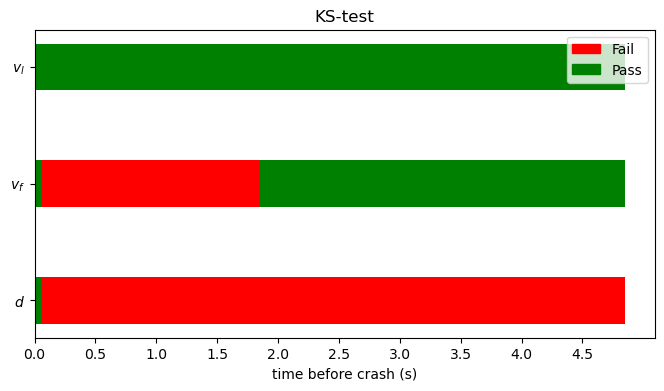

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# # Example time series data containing only 0 and 1
# time_series_1 = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
# time_series_2 = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
# time_series_3 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
# time_series_4 = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

# # Combine the time series into a list
# time_series_list = [time_series_1, time_series_2, time_series_3, time_series_4]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot each time series
for idx, time_series in enumerate(reversed(time_series_list)):
    colors = ['red' if value == 0 else 'green' for value in time_series]
    for i, value in enumerate(time_series):
        ax.barh(idx, 1, left=i, height=0.4, color=colors[i])

# Set the y-ticks and labels to represent the time series
ax.set_yticks(np.arange(len(time_series_list)))
# ax.set_yticklabels([f'Series {i+1}' for i in range(len(time_series_list))])
ax.set_yticklabels(reversed(["$v_l$","$v_f$","$d$"]))

# Label the x-axis
ax.set_xlabel('time before crash (s)')

# # Set the x-ticks to show the time points
# ax.set_xticks(np.arange(0,len(time_series_list[0])*0.05,0.05) + 0.5)
# ax.set_xticklabels(np.arange(0,len(time_series_list[0])*0.05,0.05))
x_ticks = np.arange(0, len(time_series_list[0]) * 0.05, 0.5)
ax.set_xticks(x_ticks / 0.05)
ax.set_xticklabels([f'{tick:.1f}' for tick in x_ticks])

# Add a title to the plot
plt.title('KS-test')

# Create legend
red_patch = mpatches.Patch(color='red', label='Fail')
green_patch = mpatches.Patch(color='green', label='Pass')
# plt.legend(handles=[red_patch, green_patch], title='Values')
plt.legend(handles=[red_patch, green_patch])

# Display the plot
plt.show()


In [75]:
import copy
# ID_eva = copy.deepcopy(ID_test)
ID_eva = copy.deepcopy(ID_test)

List_P = []
for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type='test')
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type='test')
    
    if para == "v_l":
        Para_raw_eva = V_l_raw[ID_eva-1]
    elif para == "v_f":
        Para_raw_eva = V_f_raw[ID_eva-1]
    elif para == "d":
        Para_raw_eva = D_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw[ID_eva-1]

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)
    List_P.append(P_value)

In [79]:
time_series_list = [list_P>0.05 for list_P in List_P]

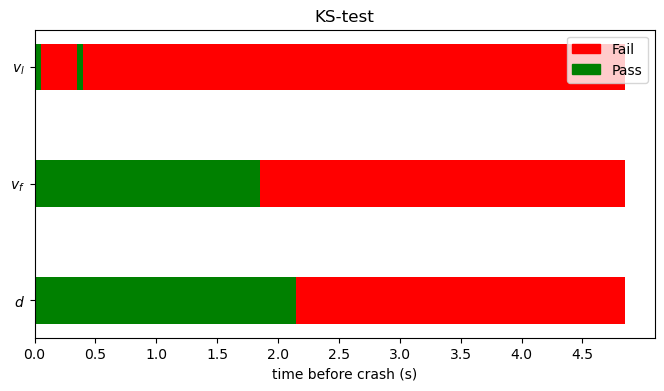

In [80]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# # Example time series data containing only 0 and 1
# time_series_1 = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
# time_series_2 = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
# time_series_3 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
# time_series_4 = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

# # Combine the time series into a list
# time_series_list = [time_series_1, time_series_2, time_series_3, time_series_4]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot each time series
for idx, time_series in enumerate(reversed(time_series_list)):
    colors = ['red' if value == 0 else 'green' for value in time_series]
    for i, value in enumerate(time_series):
        ax.barh(idx, 1, left=i, height=0.4, color=colors[i])

# Set the y-ticks and labels to represent the time series
ax.set_yticks(np.arange(len(time_series_list)))
# ax.set_yticklabels([f'Series {i+1}' for i in range(len(time_series_list))])
ax.set_yticklabels(reversed(["$v_l$","$v_f$","$d$"]))

# Label the x-axis
ax.set_xlabel('time before crash (s)')

# # Set the x-ticks to show the time points
# ax.set_xticks(np.arange(0,len(time_series_list[0])*0.05,0.05) + 0.5)
# ax.set_xticklabels(np.arange(0,len(time_series_list[0])*0.05,0.05))
x_ticks = np.arange(0, len(time_series_list[0]) * 0.05, 0.5)
ax.set_xticks(x_ticks / 0.05)
ax.set_xticklabels([f'{tick:.1f}' for tick in x_ticks])

# Add a title to the plot
plt.title('KS-test')

# Create legend
red_patch = mpatches.Patch(color='red', label='Fail')
green_patch = mpatches.Patch(color='green', label='Pass')
# plt.legend(handles=[red_patch, green_patch], title='Values')
plt.legend(handles=[red_patch, green_patch])

# Display the plot
plt.show()
